In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [19]:
df = pd.read_csv(r"C:\Users\olive\Documents\GitHub\Data-Science-For-Business-Decisions\Assignment 4\OD_2017-04.csv+ (Multiple Connections).csv",encoding='utf-8')

In [20]:
df.describe()

,Count Limit,Ride Duration,Number of Records,Code,Duration Sec,End Station Code,Is Member,Latitude,Longitude,Start Station Code
count,4740357.0,4.740357e+06,4740357.0,4.740357e+06,4.740357e+06,4.740357e+06,4.740357e+06,4.740357e+06,4.740357e+06,4.740357e+06
mean,1.0,9.474750e-03,1.0,6.325606e+03,8.181575e+02,6.320369e+03,8.110794e-01,4.551695e+01,-7.357925e+01,6.325606e+03
std,0.0,7.468440e-03,0.0,3.761087e+02,6.447420e+02,3.838790e+02,3.914456e-01,2.078102e-02,2.036524e-02,3.761087e+02
min,1.0,-3.888889e-02,1.0,5.002000e+03,6.100000e+01,5.002000e+03,0.000000e+00,4.543074e+01,-7.367011e+01,5.002000e+03
25%,1.0,4.166667e-03,1.0,6.107000e+03,3.720000e+02,6.092000e+03,1.000000e+00,4.550381e+01,-7.358911e+01,6.107000e+03
50%,1.0,7.638889e-03,1.0,6.204000e+03,6.510000e+02,6.196000e+03,1.000000e+00,4.551916e+01,-7.357610e+01,6.204000e+03
75%,1.0,1.250000e-02,1.0,6.388000e+03,1.093000e+03,6.394000e+03,1.000000e+00,4.553092e+01,-7.356545e+01,6.388000e+03
max,1.0,8.333333e-02,1.0,1.000200e+04,7.199000e+03,1.000200e+04,1.000000e+00,4.558276e+01,-7.349507e+01,1.000200e+04


In [21]:
df['Is Member'].sum()/(len(df))*100

81.10794187020092

In [22]:
df['Duration Sec'].mean()

818.1574830756417

In [23]:
station_names = []
bikes_left = []
bikes_back = []
bikes_gain = []
for i in df['Start Station Code'].unique():
    bikes_left.append(len(df[df['Start Station Code']==i]))
    bikes_back.append(len(df[df['End Station Code']==i]))
    bikes_gain.append(len(df[df['End Station Code']==i]) - len(df[df['Start Station Code']==i]))
    station_names.append(df[df['Start Station Code']==i]['Name'].tolist()[0])
result = pd.DataFrame({'Station':station_names, 'Bikes Gained':bikes_gain})
print(result.head())

                     Station  Bikes Gained
0          Milton / Durocher          1559
1   St-André / Ste-Catherine          2809
2         St-André / Ontario          2548
3  Metcalfe / de Maisonneuve         -1288
4           Guy / Notre-Dame          1840


In [29]:
result = result.sort_values(['Bikes Gained'], ascending=[0])

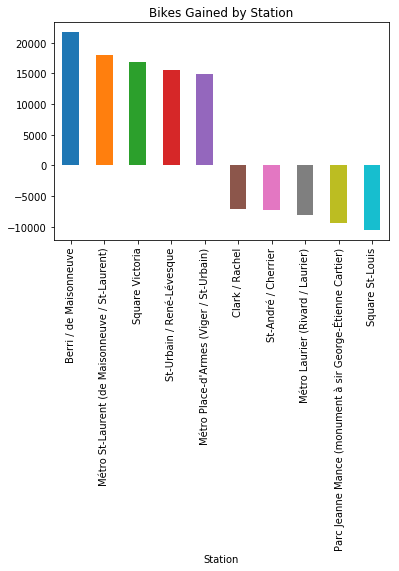

In [37]:
result.iloc[np.r_[0:5, -5:0]].plot.bar(y='Bikes Gained', x='Station', title='Bikes Gained by Station', legend=False)